Pull data from both data sources and merge into one dataframe

In [15]:
import pandas as pd
import csv
import seaborn as sns

abrv = 'CHI'
chi_weather_data = pd.read_csv(f'{abrv}_weather_data.csv', index_col='date', parse_dates=True)

chi_ridership_data = pd.read_csv('CTA_Daily_Boarding_Totals.csv', index_col='service_date', parse_dates=True)

# join ridership and weather data on date index
chi_data = chi_ridership_data.join(chi_weather_data)

# drop empty columns
chi_data.drop(['avg_hum','avg_wind','avg_pres','hi_precip','lo_precip'], axis=1, inplace=True)

# drop days with erroneous data; happens to be last two data points
chi_data.drop(chi_data['2018-06-29':].index, axis=0, inplace=True)

chi_data = pd.concat([chi_data, pd.get_dummies(chi_data['day_type'], prefix='is')],
                     axis=1).drop(['day_type'],axis=1).drop(['is_W'],axis=1)

chi_data.rename(columns={'is_A': 'is_sat', 'is_U': 'is_holi'},inplace=True)

Let's check the distributions of our variables by plotting histograms

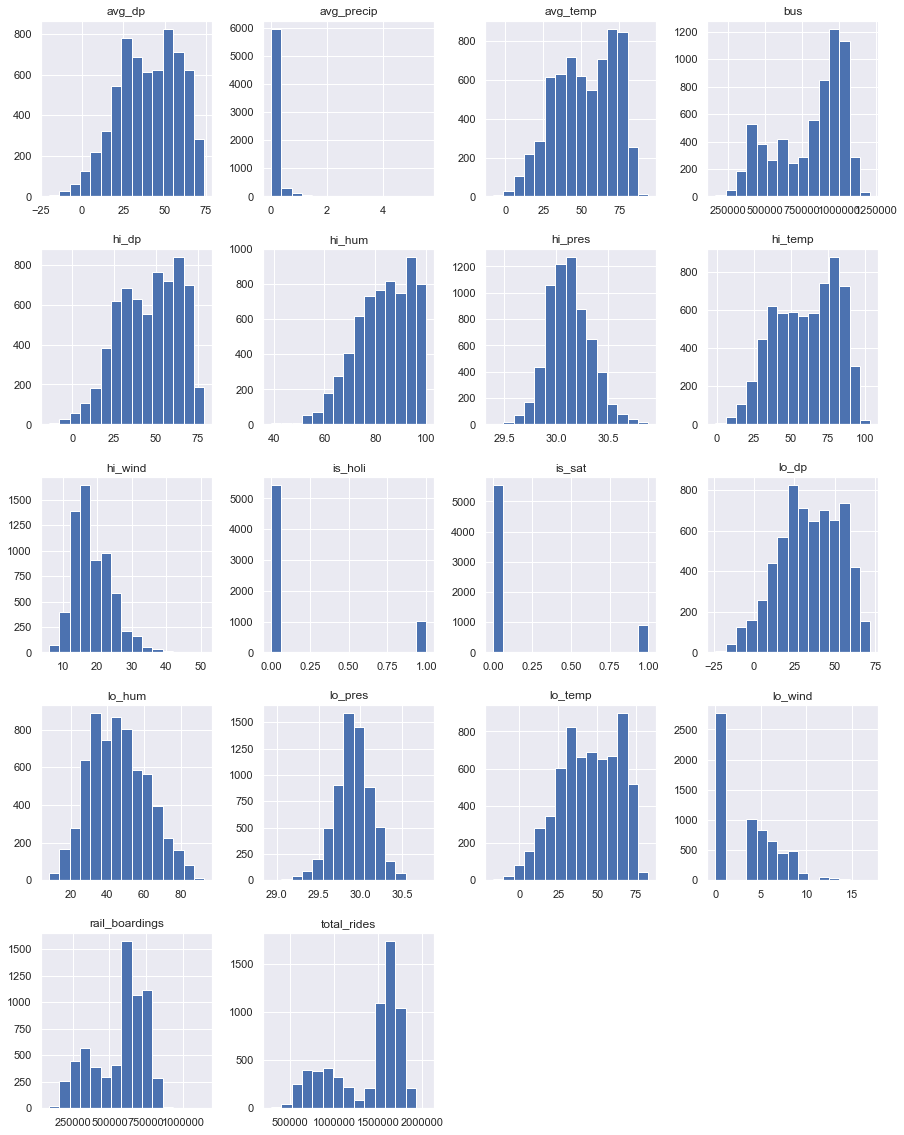

In [19]:
chi_data.hist(figsize=(15,20), layout=(5,4), bins=15);

We use the corr feature of pandas to check for collinearity amongst the variables

In [20]:
chi_data.corr()

,bus,rail_boardings,total_rides,hi_temp,avg_temp,lo_temp,hi_dp,avg_dp,lo_dp,hi_hum,lo_hum,hi_wind,lo_wind,hi_pres,lo_pres,avg_precip,is_sat,is_holi
bus,1.000000,0.833156,0.967843,0.076111,0.078287,0.082132,0.067187,0.069497,0.073415,-0.011816,-0.004697,-0.070426,-0.022333,-0.074318,-0.035355,-0.035542,-0.371301,-0.743792
rail_boardings,0.833156,1.000000,0.945484,0.157478,0.164543,0.162607,0.145312,0.148830,0.151040,-0.034368,-0.119884,0.061017,-0.032754,-0.097324,-0.047434,0.004571,-0.399619,-0.696617
total_rides,0.967843,0.945484,1.000000,0.116451,0.120945,0.122329,0.105662,0.108622,0.111934,-0.022591,-0.057297,-0.013718,-0.028050,-0.088033,-0.042395,-0.018850,-0.400420,-0.754863
hi_temp,0.076111,0.157478,0.116451,1.000000,0.989157,0.955673,0.928781,0.929432,0.909693,-0.016139,-0.305179,-0.016641,-0.248611,-0.499925,-0.222107,0.122397,-0.005417,0.010531
avg_temp,0.078287,0.164543,0.120945,0.989157,1.000000,0.987521,0.947149,0.956337,0.943693,0.016948,-0.242025,-0.023858,-0.238624,-0.520389,-0.229352,0.136574,-0.005700,0.003043
lo_temp,0.082132,0.162607,0.122329,0.955673,0.987521,1.000000,0.943753,0.962915,0.959638,0.051670,-0.165296,-0.041223,-0.226201,-0.528243,-0.227380,0.148044,-0.005141,-0.005504
hi_dp,0.067187,0.145312,0.105662,0.928781,0.947149,0.943753,1.000000,0.984068,0.944266,0.266869,-0.015181,0.041015,-0.214766,-0.569254,-0.355890,0.247965,-0.006839,-0.001123
avg_dp,0.069497,0.148830,0.108622,0.929432,0.956337,0.962915,0.984068,1.000000,0.980421,0.256196,0.013868,-0.011030,-0.242868,-0.572833,-0.316054,0.240000,-0.006138,-0.003759
lo_dp,0.073415,0.151040,0.111934,0.909693,0.943693,0.959638,0.944266,0.980421,1.000000,0.212756,0.026928,-0.065422,-0.261547,-0.548634,-0.257735,0.202403,-0.007050,-0.005054
hi_hum,-0.011816,-0.034368,-0.022591,-0.016139,0.016948,0.051670,0.266869,0.256196,0.212756,1.000000,0.608873,0.063623,-0.113903,-0.255127,-0.349022,0.366374,0.007325,-0.009059


Whoa, that's a lot of numbers to digest. Let's bring some color into our lives:

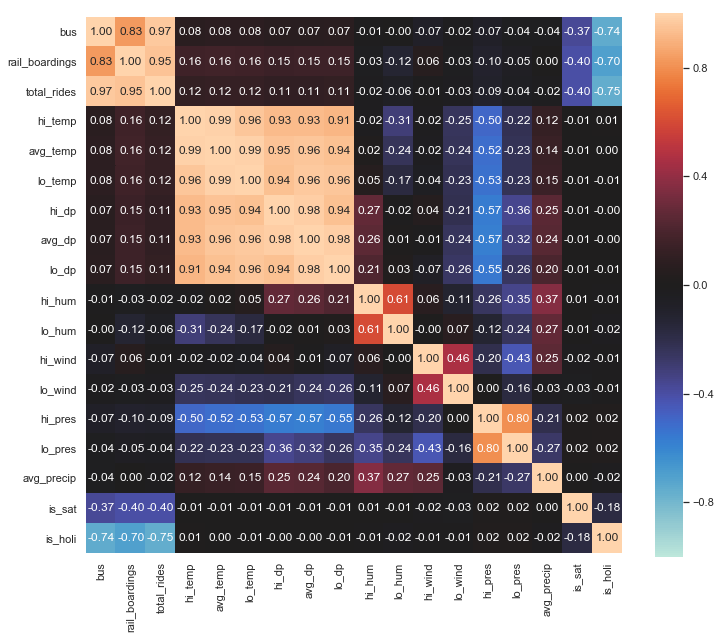

In [21]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(chi_data.corr(), fmt='.2f', center=0, vmin=-1, vmax=1, annot=True, square=True);

Here, at a glance, we can easily see that the all the temperature and dew point variables are highly collinear, as well as each hi-lo pair of the other weather variables. I begin by completely omitting all **humidity/dew point** data, as temperature, dew point and relative humidity are all related by a single function, detailed by Martin Wanielista, Robert Kersten and Ron Eaglin in _Hydrology Water Quantity and Quality Control_, and no additional information is gotten by included all three values. I further reduced collinearity by converting hi-lo variable pairs to midpoint-variability variables, and fo temperauter **and dew point**, having three variables **each**, hi-avg-lo, these become midpoint-variability-bias so as to not lose any information. 

In [22]:
chi_data.columns

Index(['bus', 'rail_boardings', 'total_rides', 'hi_temp', 'avg_temp',
       'lo_temp', 'hi_dp', 'avg_dp', 'lo_dp', 'hi_hum', 'lo_hum', 'hi_wind',
       'lo_wind', 'hi_pres', 'lo_pres', 'avg_precip', 'is_sat', 'is_holi'],
      dtype='object')

In [24]:
new_chi_data = chi_data[['bus', 'rail_boardings', 'total_rides', 'is_sat', 'is_holi', 'avg_precip']].copy()

new_chi_data['temp_mid'] = ( chi_data['hi_temp'] + chi_data['lo_temp'] ) / 2
new_chi_data['temp_rng'] = chi_data['hi_temp'] - chi_data['lo_temp']
new_chi_data['temp_bs'] = chi_data['avg_temp'] - ( chi_data['hi_temp'] + chi_data['lo_temp'] ) / 2

new_chi_data['hum_mid'] = ( chi_data['hi_hum'] + chi_data['lo_hum'] ) / 2
new_chi_data['hum_rng'] = chi_data['hi_hum'] - chi_data['lo_hum']

# new_chi_data['dp_mid'] = ( chi_data['hi_dp'] + chi_data['lo_dp'] ) / 2
# new_chi_data['dp_rng'] = chi_data['hi_dp'] - chi_data['lo_dp']
# new_chi_data['dp_bs'] = chi_data['avg_dp'] - ( chi_data['hi_dp'] + chi_data['lo_dp'] ) / 2

new_chi_data['wind_mid'] = ( chi_data['hi_wind'] + chi_data['lo_wind'] ) / 2
new_chi_data['wind_rng'] = chi_data['hi_wind'] - chi_data['lo_wind']

new_chi_data['pres_mid'] = ( chi_data['hi_pres'] + chi_data['lo_pres'] ) / 2
new_chi_data['pres_rng'] = chi_data['hi_pres'] - chi_data['lo_pres']

Checking the histograms and correlation matrix of the transformed data, we get the following:

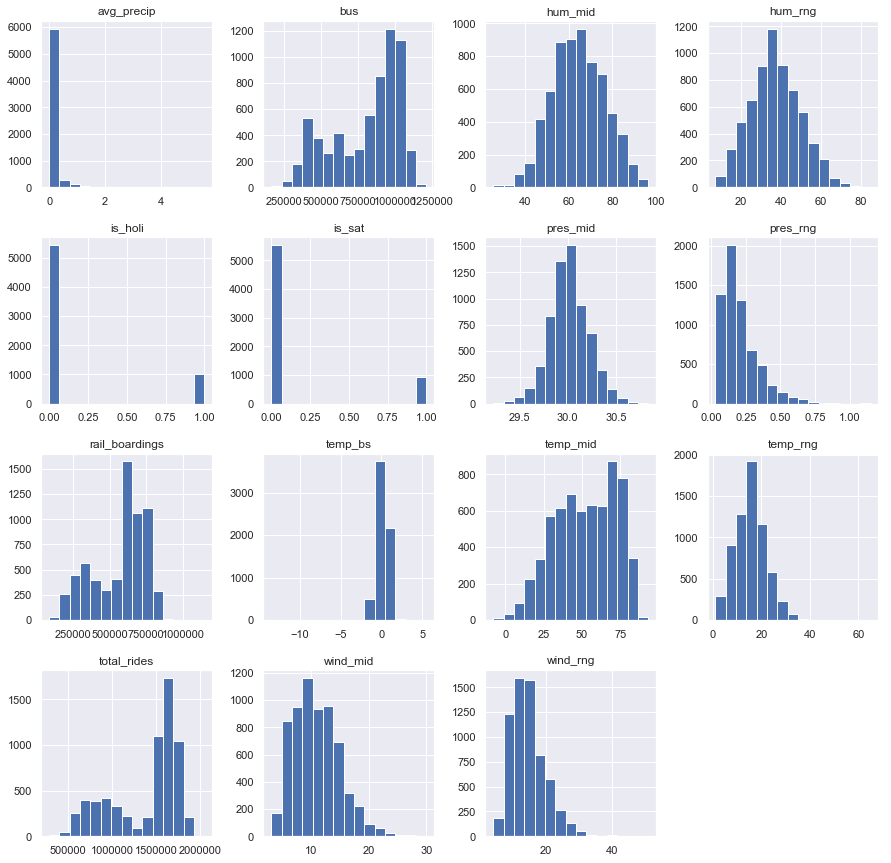

In [25]:
new_chi_data.hist(figsize=(15,15), layout=(4,4), bins=15);

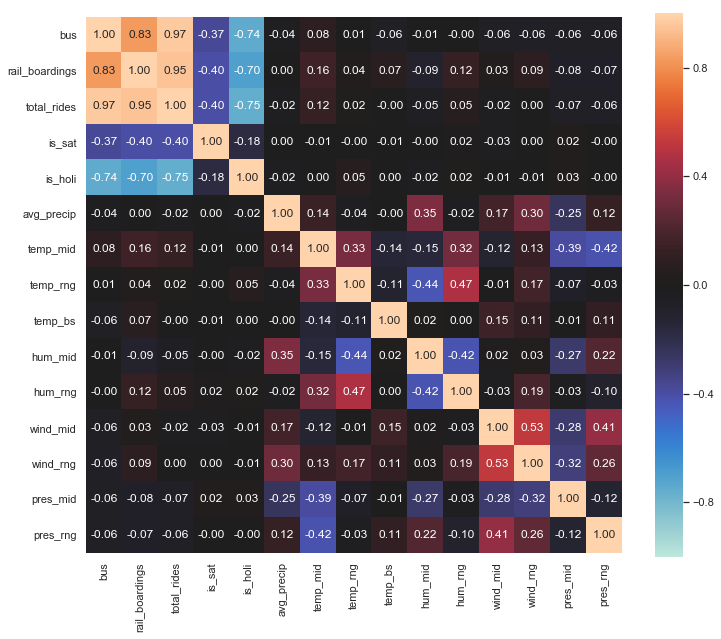

In [26]:
sns.heatmap(new_chi_data.corr(), fmt='.2f', center=0, vmin=-1, vmax=1, annot=True, square=True);

Looks alright. Let's save this dataset to disk so we can use it to build a model in the next notebook.

In [27]:
import pickle
fileObject = open('pickled_data','wb') 
pickle.dump(new_chi_data,fileObject)   
fileObject.close()

In [28]:
new_chi_data.to_csv('transformed_data.csv')